# Visualize mask experimentations results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch


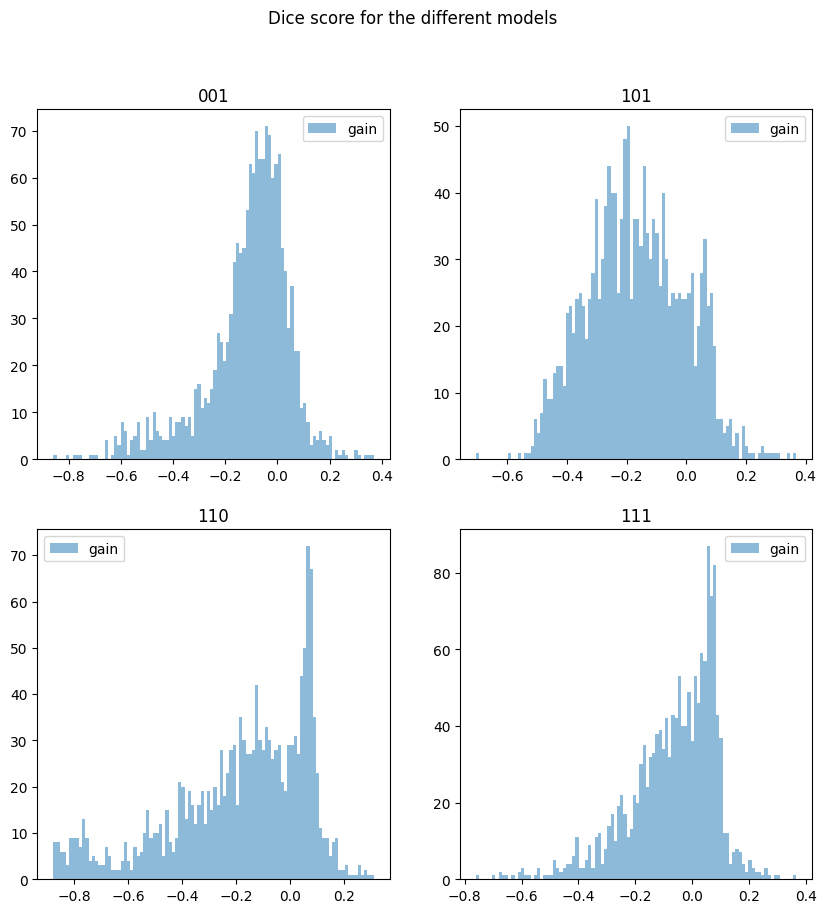

In [2]:
metrics_path = '../output/mask/metrics/'
results = {
           '001': torch.load(metrics_path + 'LBTD-NEO04001.pt'),
           '101': torch.load(metrics_path + 'LBTD-NEO04101.pt'),
           '110': torch.load(metrics_path + 'LBTD-NEO04110.pt'),
           '111': torch.load(metrics_path + 'LBTD-NEO04111.pt')}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Dice score for the different models')
for i, (key, values) in enumerate(results.items()):

    gain = np.array(values['dice']) - np.array(values['dice_input'])
    axes[i//2, i%2].hist(gain, bins=100, alpha=0.5, label='gain')
    axes[i//2, i%2].set_title(key)
    axes[i//2, i%2].legend()
    
    

In [6]:
print('Input mask performance')
for i, (key, values) in enumerate(results.items()):
    print(key, 'dice', np.array(values['dice_input']).mean(), np.array(values['dice_input']).std())
    print(key, 'iou', np.array(values['iou_input']).mean(), np.array(values['iou_input']).std())
    print(key, 'precision', np.array(values['precision_input']).mean(), np.array(values['precision_input']).std())
    print(key, 'recall', np.array(values['recall_input']).mean(), np.array(values['recall_input']).std())

print('Output mask performance')
for i, (key, values) in enumerate(results.items()):
    print(key, 'dice', np.array(values['dice']).mean(), np.array(values['dice']).std())
    print(key, 'iou', np.array(values['iou']).mean(), np.array(values['iou']).std())
    print(key, 'precision', np.array(values['precision']).mean(), np.array(values['precision']).std())
    print(key, 'recall', np.array(values['recall']).mean(), np.array(values['recall']).std())

print('Gain')
for i, (key, values) in enumerate(results.items()):
    gain_dice = np.array(values['dice']) - np.array(values['dice_input'])
    print(key, 'dice', gain_dice.mean(), gain_dice.std())
    gain_iou = np.array(values['iou']) - np.array(values['iou_input'])
    print(key, 'iou', gain_iou.mean(), gain_iou.std())
    gain_precision = np.array(values['precision']) - np.array(values['precision_input'])
    print(key, 'precision', gain_precision.mean(), gain_precision.std())
    gain_recall = np.array(values['recall']) - np.array(values['recall_input'])
    print(key, 'recall', gain_recall.mean(), gain_recall.std())

Input mask performance
001 dice 0.8335136641992804 0.0823327531092109
001 iou 0.7215025042587117 0.09991305875105254
001 precision 0.7532577104967685 0.10694720859233965
001 recall 0.945625986191192 0.03500731682054631
101 dice 0.8335136641992804 0.0823327531092109
101 iou 0.7215025042587117 0.09991305875105254
101 precision 0.7532577104967685 0.10694720859233965
101 recall 0.945625986191192 0.03500731682054631
110 dice 0.8335136641992804 0.0823327531092109
110 iou 0.7215025042587117 0.09991305875105254
110 precision 0.7532577104967685 0.10694720859233965
110 recall 0.945625986191192 0.03500731682054631
111 dice 0.8335136641992804 0.0823327531092109
111 iou 0.7215025042587117 0.09991305875105254
111 precision 0.7532577104967685 0.10694720859233965
111 recall 0.945625986191192 0.03500731682054631
Output mask performance
001 dice 0.7209337967114559 0.17088388174820057
001 iou 0.5885952602941863 0.18934748875204915
001 precision 0.6567121642707477 0.17984377918450636
001 recall 0.87453413

In [7]:
from segment_anything.build_sam import build_sam_vit_b
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader
from tqdm import tqdm
from dataset_processing.dataset import SAMDataset
from dataset_processing.preprocess import collate_fn
from utils.config import load_config

config = load_config('config.toml')
n_points = config.dataset.n_points
dataset_path = config.cytomine.dataset_path
batch_size = config.training.batch_size
prompt_type = {'points':config.dataset.points, 'box':config.dataset.box, 'neg_points':config.dataset.negative_points, 'mask':config.dataset.mask_prompt}
n_points = config.dataset.n_points
n_neg_points = config.dataset.n_neg_points
inside_box = config.dataset.negative_points_inside_box
points_near_center = config.dataset.points_near_center
random_box_shift = config.dataset.random_box_shift
mask_prompt_type = config.dataset.mask_prompt_type
box_around_mask = config.dataset.box_around_prompt_mask

prompt_type['points'] = False
prompt_type['neg_points'] = False

dataset = SAMDataset(dataset_path, prompt_type=prompt_type, n_points=n_points, n_neg_points=n_neg_points, verbose=True, to_dict=True, neg_points_inside_box=inside_box, points_near_center=points_near_center, random_box_shift=random_box_shift, mask_prompt_type=mask_prompt_type, box_around_mask=box_around_mask)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

exp_id = '101'
#Visualise the ten best and worst images
scores = (np.array(results[exp_id]['dice']) - np.array(results[exp_id]['dice_input'])) * np.array(results[exp_id]['dice_input'])
best = np.argsort(scores)[::-1][:10]
worst = np.argsort(scores)[10:20]





Loading images and masks paths...


Computing masks...: 100%|██████████| 1538/1538 [00:03<00:00, 391.57it/s]


Done!


../datasets/LBTD-NEO04/processed/67_117/img.jpg
../datasets/LBTD-NEO04/processed/4_5/img.jpg
../datasets/LBTD-NEO04/processed/2_21/img.jpg
../datasets/LBTD-NEO04/processed/67_34/img.jpg
../datasets/LBTD-NEO04/processed/67_197/img.jpg
../datasets/LBTD-NEO04/processed/5_44/img.jpg
../datasets/LBTD-NEO04/processed/5_10/img.jpg
../datasets/LBTD-NEO04/processed/4_15/img.jpg
../datasets/LBTD-NEO04/processed/4_96/img.jpg
../datasets/LBTD-NEO04/processed/67_237/img.jpg


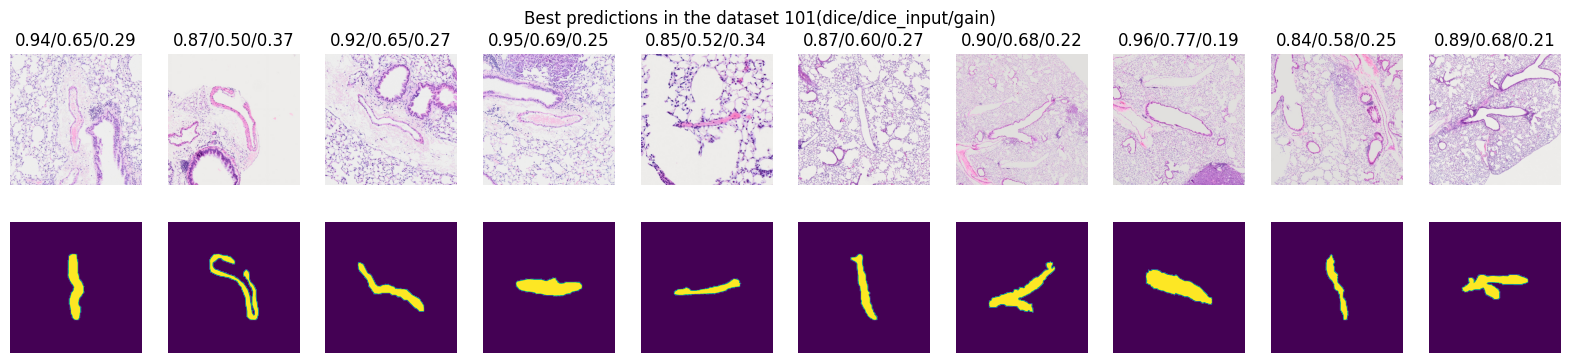

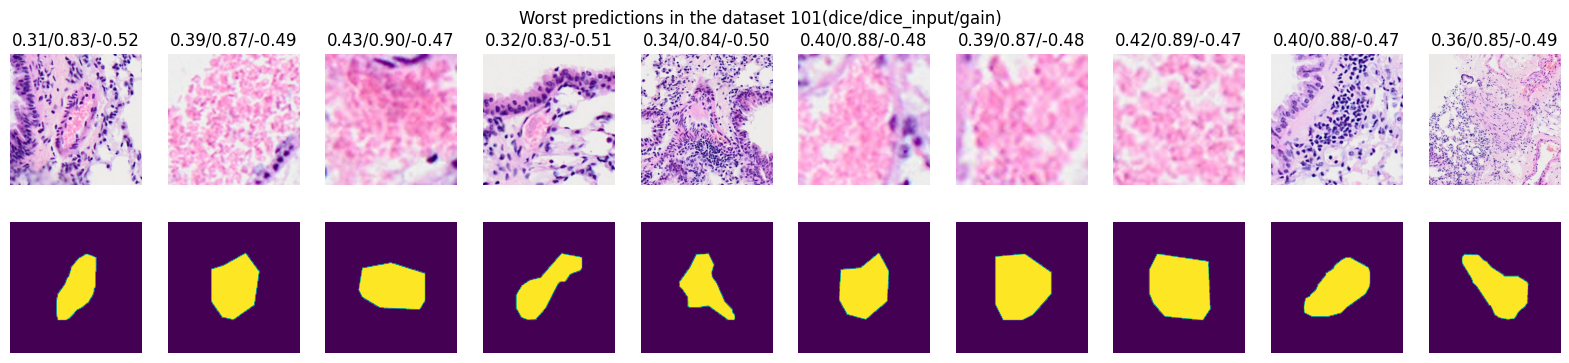

In [9]:
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle('Best predictions in the dataset ' + exp_id + '(dice/dice_input/gain)')
for i, idx in enumerate(best):
    data, mask = dataset[idx]
    axes[0, i].imshow(np.array(data['image'].cpu().permute(1, 2, 0).numpy(), dtype=np.uint8))
    axes[0, i].axis('off')
    axes[0, i].set_title('{:.2f}/{:.2f}/{:.2f}'.format(results[exp_id]['dice'][idx], results[exp_id]['dice_input'][idx], results[exp_id]['dice'][idx] - results[exp_id]['dice_input'][idx]))
    axes[1, i].imshow(mask)
    axes[1, i].axis('off')

fig, axes = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle('Worst predictions in the dataset ' + exp_id + '(dice/dice_input/gain)')
for i, idx in enumerate(worst):
    data, mask = dataset[idx]
    print(dataset.images[idx])
    axes[0, i].imshow(np.array(data['image'].cpu().permute(1, 2, 0).numpy(), dtype=np.uint8))
    axes[0, i].axis('off')
    axes[0, i].set_title('{:.2f}/{:.2f}/{:.2f}'.format(results[exp_id]['dice'][idx], results[exp_id]['dice_input'][idx], results[exp_id]['dice'][idx] - results[exp_id]['dice_input'][idx]))
    axes[1, i].imshow(mask)
    axes[1, i].axis('off')
    